In [1]:
# Dependencies
import sys
import spotipy
import pprint
import json
import requests
import numpy as np 
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import scipy.stats as st
import chartify

client_id = "xx" 
client_secret = "xx"



ModuleNotFoundError: No module named 'spotipy'

In [3]:
# Make the API Call
if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    username = 'jsjordan79'
    
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

result = sp.search(username)
pprint.pprint(result)

In [5]:
# Read CSV File
spotify_data = "../project-one/SpotifyFeatures.csv"
spotify_data = pd.read_csv(spotify_data)

spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [6]:
# 3. Who is the highest streamed artist:
#    a. Female - grouby artist, sum streams
#    b. Male
#.   c. Group

#Note: # of streams is looked at in terms of popularity 
#Popularity is a unit of measure that derives from the total number of times a track has been played (streamed).  
#“The popularity of the track. The value will be between 0, for least popular, and 100 for most popular. 
# The popularity of a track is a value between 0 and 100, with 100 being the most popular. 
# Popularity is based mainly on the total number of playbacks. Duplicate tracks, such as both in a single and in an album, 
# are popularity rated differently. Note: This value is not updated in real-time and may therefore lag behind in actual 
#     popularity.”


In [7]:
# Define values to determine: Who is the highest streamed artist:
#    a. Female - grouby artist, sum streams
#    b. Male
#    c. Group

artist_name = []
track_name = []
track_id = []
popularity = []

# Create a forloop:
track_results = sp.search(q='year:2019', type='track', limit=20,offset=0)
#     track_results = sp.search(q='popularity:100', type='track', limit=50,offset=0)
for i, t in enumerate(track_results['tracks']['items']):
    artist_name.append(t['artists'][0]['name'])
    track_name.append(t['name'])
    track_id.append(t['id'])
    popularity.append(t['popularity'])
       
        


In [8]:
# Create the dataframe of the above outcome:
track_df = pd.DataFrame({
    "Artist": artist_name,
    "Song": track_name, 
    "Song ID": track_id,
    "Popularity": popularity
})

def get_popularity(track_df):
    return elem['popularity']

track_df

,Artist,Song,Song ID,Popularity
0,Lizzo,Truth Hurts,5qmq61DAAOUaW8AUo8xKhh,94
1,Drake,Money In The Grave (Drake ft. Rick Ross),5ry2OE6R2zPQFDO85XkgRb,93
2,Shawn Mendes,Señorita,0TK2YIli7K1leLovkQiNik,100
3,Lil Nas X,Panini,6fTt0CH2t0mdeB2N9XFG5r,93
4,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,94
5,Lil Tecca,Ransom,6EOKwHETwSkZ9gW2b6ASE0,93
6,Billie Eilish,bad guy,2Fxmhks0bxGSBdJ92vM42m,96
7,DaBaby,Suge,2gwkD6igEhQbDQegRCcdoB,88
8,Young Thug,Hot (feat. Gunna),5Z8HZM6iQMhhqyPcCGY5g9,88
9,Lewis Capaldi,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,94


In [23]:
# Create a DataFrame of the top 20 Artist based on Popularity

popularity_df = pd.DataFrame({
    "Artist": artist_name,
    "Popularity": popularity
})

def get_popularity(track_df):
    return elem['popularity']

popularity_df

,Artist,Popularity
0,Lizzo,94
1,Drake,93
2,Shawn Mendes,100
3,Lil Nas X,93
4,Post Malone,94
5,Lil Tecca,93
6,Billie Eilish,96
7,DaBaby,88
8,Young Thug,88
9,Lewis Capaldi,94


In [10]:
# Create a DataFrame of the top 20 Songs based on Popularity

pop_song_df = pd.DataFrame({
    "Song": track_name,
    "Popularity": popularity
})

def get_popularity(track_df):
    return elem['popularity']

pop_song_df

,Song,Popularity
0,Truth Hurts,94
1,Money In The Grave (Drake ft. Rick Ross),93
2,Señorita,100
3,Panini,93
4,Circles,94
5,Ransom,93
6,bad guy,96
7,Suge,88
8,Hot (feat. Gunna),88
9,Someone You Loved,94


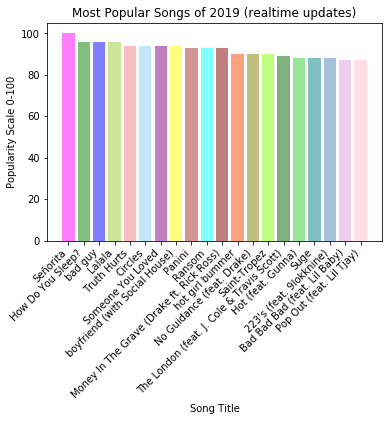

In [46]:
#Plot the most popular Songs based on Popularity
# create a list of numbers for x values

tick_locations = np.arange(len(track_df))
colors = ["magenta", "green", "blue", "yellowgreen", "lightcoral", "lightskyblue", "purple", "yellow", "brown", "aqua",
       "maroon", "orangered", "olive", "lawngreen", "darkgreen", "limegreen", "teal", "steelblue", "plum", "pink"]
songs_df = track_df.sort_values("Popularity", ascending=False)
# create bar chart and set the values of xticks
plt.bar(tick_locations, songs_df['Popularity'], align="center", alpha=0.5, color=colors)
plt.xticks(tick_locations, songs_df['Song'], rotation=45, ha="right")
plt.title("Most Popular Songs of 2019 (realtime updates)")
plt.ylabel("Popularity Scale 0-100")
plt.xlabel("Song Title")
plt.show()

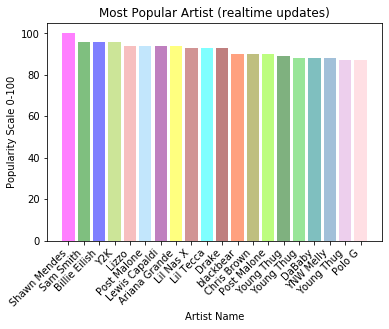

In [47]:
#Plot the most popular Artist based on Popularity
# create a list of numbers for x values

tick_locations = np.arange(len(track_df))
colors = ["magenta", "green", "blue", "yellowgreen", "lightcoral", "lightskyblue", "purple", "yellow", "brown", "aqua",
       "maroon", "orangered", "olive", "lawngreen", "darkgreen", "limegreen", "teal", "steelblue", "plum", "pink"]
sorted_df = track_df.sort_values("Popularity", ascending=False)

# create bar chart and set the values of xticks
plt.bar(tick_locations, sorted_df['Popularity'], align="center", alpha=0.5, color=colors)
plt.xticks(tick_locations, sorted_df['Artist'], rotation=45, ha="right")
plt.title("Most Popular Artist (realtime updates)")
plt.ylabel("Popularity Scale 0-100")
plt.xlabel("Artist Name")
plt.show()